# Temporal and Spatial DataMining

## Exercise_06_Similarity

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
from utils.TimeSeries import TS_1, TS_2
from scipy.linalg import norm
from matplotlib import cm
plt.style.use('ggplot')

### Task 1: DTW

**a)** Understanding DTW

Explain the procedure of the DTW algorithm 

>**Tip:** Take a look at the lecture notes, in "Information Retrieval for Music and Motion" by Müller (Chapter 4, as an e-book in the library), in the "Everything you know about Dynamic Time Warping is Wrong" by Ratanamahatana and Keogh, in "Exact Indexing of Dynamic Time Warping" by Keogh.)

**Q1.** What is a "local cost function"?


 **---  Your Text Here ----** 


**Q2.** What is a "DTW matrix"?


Distances to get to get to (i,j) from (0,0) in the matrix.
Minimal sum of distances to get to (i,j) from (0,0) in the matrix.


**Q3.** What is a warping path?

mappings between the two time series that minimizes the distance between them.


**Q4.** What is indexing and what are "lower bounds"?

indexing:

lower bounds: limits path to certain area close to the diagonal

**Q5.(UPDATE)** In which cases is it possible to obtain more than one warping path when calculating the similarity of two Time Series? What is the difference between the obtained paths?

if there are multiple minimum values in the DTW matrix, there are multiple warping paths. 
The difference between the paths is that they map different elements onto each other.

**Q6.** Is DTW robust against outliers? (that is, do outliers change the DTW value?)

Yes, bc if outliers create a big distance, the path will be adjusted to avoid the outlier.

**Q7.** What is the difference between norm and metric?


 **---  Your Text Here ----** 


**Q8.** Is Euclidean Distance a Metric? What must be fulfilled to call a function  $d(\mathbf{x},\mathbf{y})$ a metric?

- non-negativity
- only zero if x=y
- triangle inequality 

**Q9.** Is DTW a metric?


 **---  Your Text Here ----** 


**b)** Implement the calculation of the accumulated cost matrix in the function **dtw**. Then execute the function with the given **x** and **y** values.

In [7]:
def dtw(x, y, dist, warp=1):
    """
    Computes Dynamic Time Warping (DTW) of two sequences.
    :param array x: N1*M array
    :param array y: N2*M array
    :param func dist: distance used as cost measure
    :param int warp: how many shifts are computed.
    Returns the minimum distance, the cost matrix, the accumulated cost matrix, and the wrap path.
    """
    assert len(x)
    assert len(y)
    r, c = len(x), len(y)
    D0 = np.zeros((r + 1, c + 1))
    D0[0, 1:] = np.inf
    D0[1:, 0] = np.inf
    D1 = D0[1:, 1:]  # view
    for i in range(r):
        for j in range(c):
            D1[i, j] = dist(x[i], y[j])
    C = D1.copy()
    print(C)
    ####################
    # Your Code Here   #
    ####################
    if len(x)==1:
        path = np.zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), np.zeros(len(x))
    else:
        path = _traceback(D0)
        
    return D1[-1, -1] / sum(D1.shape), C, D1, path

def _traceback(D):
    i, j = np.array(D.shape) - 2
    p, q = [i], [j]
    while (i > 0) or (j > 0):
        tb = np.argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if tb == 0:
            i -= 1
            j -= 1
        elif tb == 1:
            i -= 1
        else:  # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return np.array(p), np.array(q)


In [8]:
t1,c = TS_1(x1=5, samples=50)
t2,d = TS_2(x1=5, samples=40)

x=c.reshape(-1,1)
y=d.reshape(-1,1)

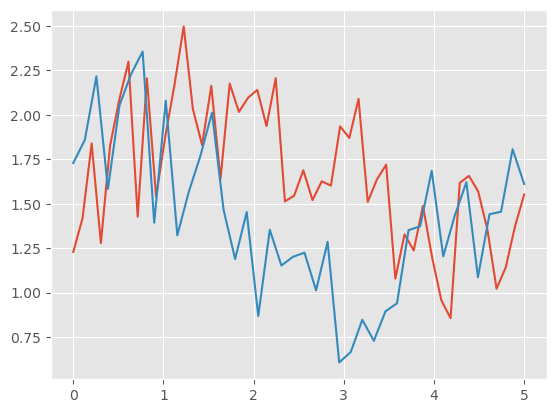

In [9]:
plt.plot(t1,c)
plt.plot(t2,d)

In [10]:
import tslearn
from tslearn import metrics

ModuleNotFoundError: No module named 'tslearn'

In [ ]:
def simple_distance(X1, X2, p):
    return np.sum(np.abs(X1-X2)**p)**(1/p)

# plot the accumulated cost martix and the wrap path
dist, cost, acc, path = dtw(x, y, dist=lambda x, y: simple_distance(x, y, 2))

####################
# Your Code Here   #
####################

### Task 2: LCSS

**a)** Implement the function **lcss** and output the longest subsequence of the two given sequences.

**Hint**:
[The lcss function defined](https://en.wikipedia.org/wiki/Longest_common_subsequence_problem):

1. $lcss(x_i, y_i)=\varnothing$, if $i = 0$ or $j = 0$
2. $lcss(x_i, y_i)=lcss(x_{i-1}, y_{j-1})^{\wedge}x_i$, if $i,j > 0$ and $x_i=y_j$
3. $lcss(x_i, y_i)=max\{lcss(x_i, y_{j-1}), lcss(x_{i-1}, y_j)\}$, if $i,j > 0$ and $x_i\neq y_j$


In [ ]:
def lcss(x, y):
    '''
    x: a string with length of N
    y: a string with length of M
    Output: the longest subsequences.
    '''
    matrix = [''] * (len(x) + 1)
    for index_x in range(len(matrix)):
        matrix[index_x] = [''] * (len(y) + 1)
    
    ####################
    # Your Code Here   #
    ####################
    
    return matrix[len(x)][len(y)]

In [ ]:
x = "abcdef"
y = "adabceqdf"
print('The longest subsequences is:', lcss(x, y))

>LCSS Matrix:

```
[['', '', '', '', '', '', '', '', '', ''],
 ['', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a'],
 ['', 'a', 'a', 'a', 'ab', 'ab', 'ab', 'ab', 'ab', 'ab'],
 ['', 'a', 'a', 'a', 'ab', 'abc', 'abc', 'abc', 'abc', 'abc'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abc', 'abc', 'abcd', 'abcd'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abce', 'abce', 'abcd', 'abcd'],
 ['', 'a', 'ad', 'ad', 'ab', 'abc', 'abce', 'abce', 'abcd', 'abcdf']]
```

### Task 3: ED

**a)** Implement the function to calculate edit distance based on the following formulas:


1. $dist1 = ED(i-1, j-1)$, if $x_i=y_i$
2. $dist2 = ED(i-1, j-1) + 1$, (replace)
3. $dist3 = ED(i, j-1) + 1$, (insert)
4. $dist4 = ED(i-1, j) + 1$, (delete)

$ED(i,j) = min\{dist1, dist2, dist3, dist4\}$, with $ED(0,0)=0$, $ED(i,0)=i$ and $ED(0,j)=j$

In [ ]:
def edit_distance(str_a,str_b):
    """
    :param str_a:
    :param str_b:
    :return: Edit distance
    """
    str_a=str_a.lower()
    str_b=str_b.lower()
    matrix_ed=np.zeros((len(str_a)+1,len(str_b)+1),dtype=int)
    matrix_ed[0]=np.arange(len(str_b)+1)
    matrix_ed[:,0] = np.arange(len(str_a) + 1)
    
    ####################
    # Your Code Here   #
    ####################
        
    return matrix_ed[-1,-1]

**b)** Calculate the edit distance between x1 and x2.

In [ ]:
x1 = 'love'
x2 = 'lolpe'

print('The edit distance between x1 and x2 is:', edit_distance(x1, x2))

>ED Matrix:

```
array([[0, 1, 2, 3, 4, 5],
       [1, 0, 1, 2, 3, 4],
       [2, 1, 0, 1, 2, 3],
       [3, 2, 1, 1, 2, 3],
       [4, 3, 2, 2, 2, 2]])
```

### Task 4: TWED (Bonus)

**a)** Read the paper entitled "Time Warp Edit Distance with Stiffness Adjustment for Time Series Matching" https://ieeexplore.ieee.org/document/4479483 of Pierre-François Marteau 
> Sections: **3, 3.1, and 4.1 - 4.4**

> Furthermore: Wikipedia [article](https://de.wikipedia.org/wiki/Time_Warp_Edit_Distance) on TWED. 

**b)** What is "Stiffness Adjustment"?


 **---  Your Text Here ----** 


**c)** Is TWED a metric? 


 **---  Your Text Here ----** 


**d)** Implement the TWED function. 

In [ ]:
def init_matrix(data):
    for i in range(len(data)):
        data[i][0] = float('inf')
    for i in range(len(data[0])):
        data[0][i] = float('inf')
    data[0][0] = 0
    return data

def LpDist(time_pt_1, time_pt_2):
    
    pass
    ####################
    # Your Code Here   #
    ####################

def TWED(t1, t2, lam, nu):
    """"
    Requires: 
    t1: multivariate time series in numpy matrix format. 
    t2: multivariate time series in numpy matrix format. 
    lam: penalty lambda parameter, 
    nu: stiffness coefficient
    
    Returns the TWED distance between the two time series. 
    """
    t1_time, t1_data = t1
    t2_time, t2_data = t2
    result = [[0]*len(t2_data) for row in range(len(t1_data))]
    result = init_matrix(result)
    
    pass
    ####################
    # Your Code Here   #
    ####################
    return result[n-1][m-1]

In [ ]:
ts_1 = TS_1(x1=5, samples=50)
ts_2 = TS_2(x1=5, samples=50)

# calculate the distance between time series ts_1 and ts_2

####################
# Your Code Here   #
####################